<a href="https://colab.research.google.com/github/dasheng09/MJ/blob/main/%E5%88%87%E5%88%86%E5%B9%B6%E4%B8%94%E6%A0%87%E7%AD%BE%E6%AD%A3%E7%A1%AE4.25%20%2019.55.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-9zcicnvo
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-9zcicnvo
  Resolved https://github.com/openai/CLIP.git to commit a9b1bf5920416aaeaec965c25dd9e8f98c864f16
  Preparing metadata (setup.py) ... done


In [35]:
import clip
print(clip.available_models())

['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']


In [36]:
import torch
import clip
from PIL import Image
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-L/14@336px", device=device)

In [37]:
import glob
file_list = glob.glob("/content/drive/MyDrive/stable_diffusion/*/*/*.png")
file_list.sort()

In [38]:
print(file_list[96:96+12])

[]


In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import clip
print(clip.available_models())


import torch
import clip
from PIL import Image
# device = "cuda" if torch.cuda.is_available() else "cpu"
# model, preprocess = clip.load("ViT-L/14@336px", device=device)


import glob
file_list = glob.glob("/content/drive/MyDrive/stable_diffusion/*/*/*.png")
file_list.sort()

print(file_list[0:0+12])

# from google.colab import drive

# drive.mount('/content/drive')



from PIL import ImageFont, ImageDraw
# fnt = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', 40)
dimensions = {"Abstract Paintings": (512, 512), "Landscapes": (512, 512), "Portraits": (512, 512), 
          "Still Lifes": (512, 512), "Watercolor": (512, 512), "Concept character": (512, 512)}

for i, f in enumerate(file_list):
  if "V2" in f:
    sd = "V2"
  elif "V3" in f:
    sd = "V3"
  elif "V4" in f:
    sd = "V4"
  elif "V5" in f:
    sd = "V5"
  elif "NIJI4" in f:
    sd = "NIJI4"
  elif "NIJI5" in f:
    sd = "NIJI5"
  elif "NIJI EX" in f:
    sd = "NIJI EX"
  elif "NIJI CU" in f:
    sd = "NIJI CU"
  else:
    sd = "SD"
  c = i%4
  print(f)
  parts = f.split("/")
  subject = parts[5]
  prompt = parts[6]
  dims = dimensions[subject]
  img = Image.open(f)
  width, height = img.size
  
 
# 前两个坐标点是左上角坐标
# 后两个坐标点是右下角坐标
# width在前， height在后
  img = Image.open(f)
  width, height = img.size

  if width % 2 != 0 or height % 2 != 0:
        img = img.resize((width + 1, height + 1))
        width, height = img.size

  half_width = width // 2
  half_height = height // 2

  if width != height:
        print(f"图像 {f} 不是正方形，已跳过。")
        continue

  half_width = width // 2
  half_height = height // 2
   # 动态调整字体大小
  font_size = int(half_width * 0.1)
  fnt = ImageFont.truetype('/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', font_size)

  positions = [(0, 0), (half_width, 0), (0, half_height), (half_width, half_height)]

  for idx, position in enumerate(positions):
        cropped_img = img.crop((position[0], position[1], position[0] + half_width, position[1] + half_height))
        draw = ImageDraw.Draw(cropped_img)
        label = f"{sd} {idx}"
        draw.text((font_size // 2, font_size // 2), label, font=fnt, fill=(255, 255, 255, 255))
        cropped_img.save(f"/content/drive/MyDrive/stable_diffusion/charts/{subject}/{parts[7]}{prompt}_{sd}_crop{idx}.jpg")
  img.crop((0, 0, half_width, half_height)).save("/content/drive/MyDrive/stable_diffusion/charts/" + subject + "/" + parts[7] + prompt + "_" + sd + 'crop0.jpg')
  img.crop((half_width, 0, width, half_height)).save("/content/drive/MyDrive/stable_diffusion/charts/" + subject + "/" + prompt + "_" + sd + 'crop1.jpg')
  img.crop((0, half_height, half_width, height)).save("/content/drive/MyDrive/stable_diffusion/charts/" + subject + "/" + prompt + "_" + sd + 'crop2.jpg')
  img.crop((half_width, half_height, width, height)).save("/content/drive/MyDrive/stable_diffusion/charts/" + subject + "/" + prompt + "_" + sd + 'crop3.jpg')
 
  

['RN50', 'RN101', 'RN50x4', 'RN50x16', 'RN50x64', 'ViT-B/32', 'ViT-B/16', 'ViT-L/14', 'ViT-L/14@336px']
['/content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI CU-1.png', '/content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI EX-1.png', '/content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI4-1.png', '/content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI5-1.png', '/content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/V2-1.png', '/content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/V3-1.png', '/content/drive/MyDrive/stable_diffusion/Portraits/A beau

 0.0226  0.0104 /content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI CU-1.png
 0.0771  0.0229 /content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI EX-1.png
 0.0026  0.0463 /content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI4-1.png
 0.1091  0.0273 /content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/NIJI5-1.png
 0.0109  0.0233 /content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/V2-1.png
 0.0609  0.0087 /content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl in the sun Portraits by Childe Hassam+Edgar Payne+sorolla/V3-1.png
 0.0059  0.0476 /content/drive/MyDrive/stable_diffusion/Portraits/A beautiful girl i

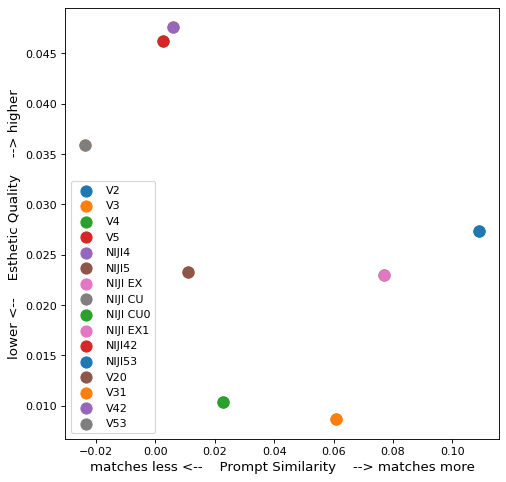

In [63]:
from IPython.display import display
prompt_similarities = []
esthetic_qualities = []
embeddings = []
labels = []
category_labels = {}

start = 0

for i, f in enumerate(file_list[0:192]):
  if "V2" in f:
    sd = "V2"
  elif "V3" in f:
    sd = "V3"
  elif "V4" in f:
    sd = "V4"
  elif "V5" in f:
    sd = "V5"
  elif "NIJI4" in f:
    sd = "NIJI4"
  elif "NIJI5" in f:
    sd = "NIJI5"
  elif "NIJI EX" in f:
    sd = "NIJI EX"
  elif "NIJI CU" in f:
    sd = "NIJI CU"

  c = i%4
  labels.append(sd+str(c))
  parts = f.split("/")
  subject = parts[5]
  prompt = parts[6]
  # print(sd, c, subject, prompt, f)

  img = Image.open(f)
  img_resized = img.resize((336, 336))
  # display(img_resized)

  image = preprocess(img_resized).unsqueeze(0).to(device)
  text = clip.tokenize(["fake art", "real art", "bad art", "good art", 
    prompt]).to(device)

  with torch.no_grad():
    image_features = model.encode_image(image)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    embeddings.append(image_features.flatten().cpu().tolist())
    text_features = model.encode_text(text)
    text_features /= text_features.norm(dim=-1, keepdim=True)
    similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

  fake = similarity[0][0]
  real = similarity[1][0]
  bad = similarity[2][0]
  good = similarity[3][0]
  esthetic_quality = (real-fake) + (good-bad)

  prompt_similarity = similarity[4][0]

  prompt_similarities.append(esthetic_quality)
  esthetic_qualities.append(prompt_similarity)

  print("{:7.4f}".format(prompt_similarity), "{:7.4f}".format(esthetic_quality), f)
  
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(7, 7), dpi=80)

plt.xlabel("matches less <--    Prompt Similarity    --> matches more", fontsize=12)
plt.ylabel("lower <--    Esthetic Quality    --> higher", fontsize=12)
plt.scatter(esthetic_qualities[8:12], prompt_similarities[8:12], s=100, label="V2")
plt.scatter(esthetic_qualities[4:8], prompt_similarities[4:8], s=100, label="V3")
plt.scatter(esthetic_qualities[0:4], prompt_similarities[0:4], s=100, label="V4")
plt.scatter(esthetic_qualities[12:16], prompt_similarities[12:16], s=100, label="V5")
plt.scatter(esthetic_qualities[16:20], prompt_similarities[16:20], s=100, label="NIJI4")
plt.scatter(esthetic_qualities[20:24], prompt_similarities[20:24], s=100, label="NIJI5")
plt.scatter(esthetic_qualities[24:28], prompt_similarities[24:28], s=100, label="NIJI EX")
plt.scatter(esthetic_qualities[28:32], prompt_similarities[28:32], s=100, label="NIJI CU")
plt.legend(loc="lower left")
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray']
plt.legend(loc="lower left")
for j in range(0, len(esthetic_qualities), 4):
    category = labels[j]
    color = colors[j // 4 % len(colors)]  # 使用取模运算符
    if category not in category_labels:
        category_labels[category] = True
        plt.scatter(esthetic_qualities[j:j + 4], prompt_similarities[j:j + 4], s=100, label=category, color=color)
    else:
        plt.scatter(esthetic_qualities[j:j + 4], prompt_similarities[j:j + 4], s=100, color=color)
for i, txt in enumerate(labels):

  plt.show()